In [1]:
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df =pd.read_csv('E:\Python\ML\mushroom_cleaned.csv')
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [3]:
df.tail()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1
54034,72,5,3,2,1.158311,492,12,0.888450,1


In [4]:
df.shape

(54035, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [6]:
df.isna().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(303)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,53732.0,568.629178,360.384461,0.000000,290.000000,528.000000,782.000000,1891.000000
cap-shape,53732.0,4.005900,2.165188,0.000000,2.000000,5.000000,6.000000,6.000000
gill-attachment,53732.0,2.142857,2.232546,0.000000,0.000000,1.000000,4.000000,6.000000
gill-color,53732.0,7.344599,3.190447,0.000000,5.000000,8.000000,10.000000,11.000000
stem-height,53732.0,0.752102,0.645987,0.000426,0.270146,0.589316,1.046900,3.835320
stem-width,53732.0,1057.000633,780.263033,0.000000,430.000000,929.000000,1527.000000,3569.000000
stem-color,53732.0,8.454013,3.235507,0.000000,6.000000,11.000000,11.000000,12.000000
season,53732.0,0.952322,0.303795,0.027372,0.888450,0.943195,0.943195,1.804273
class,53732.0,0.546639,0.497825,0.000000,0.000000,1.000000,1.000000,1.000000


In [10]:
df.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

In [11]:
col = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class']

cap-diameter


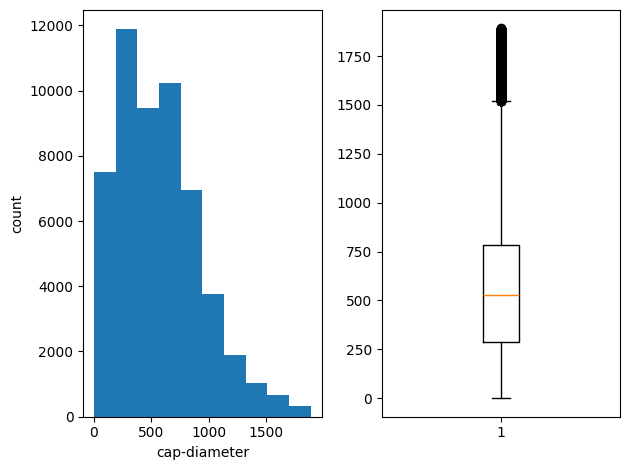

cap-shape


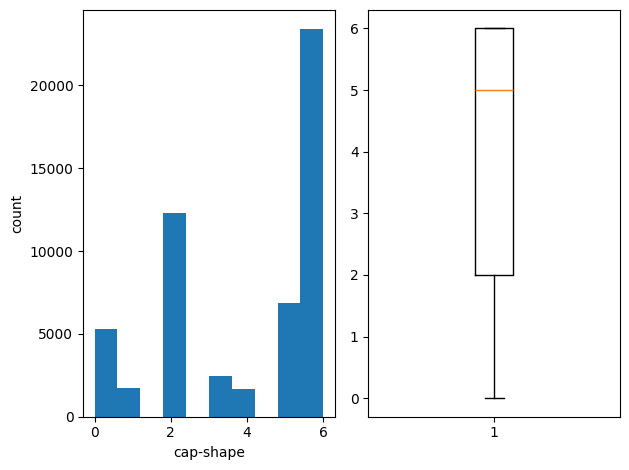

gill-attachment


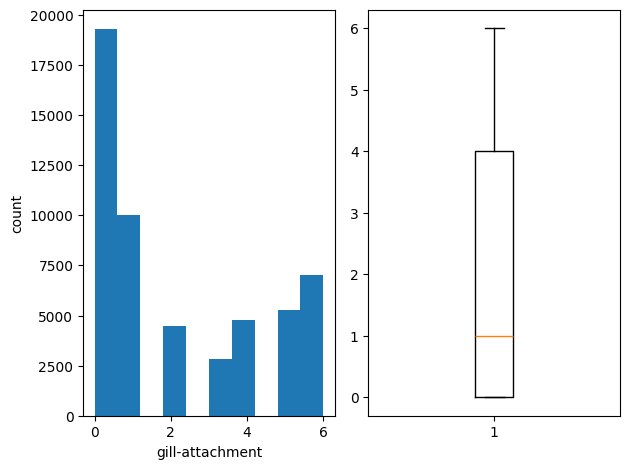

gill-color


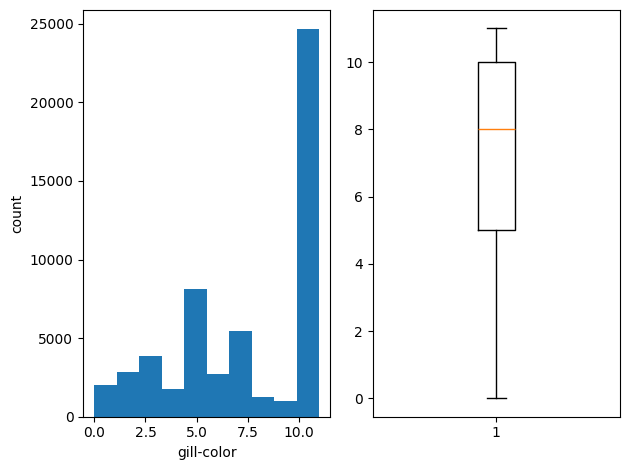

stem-height


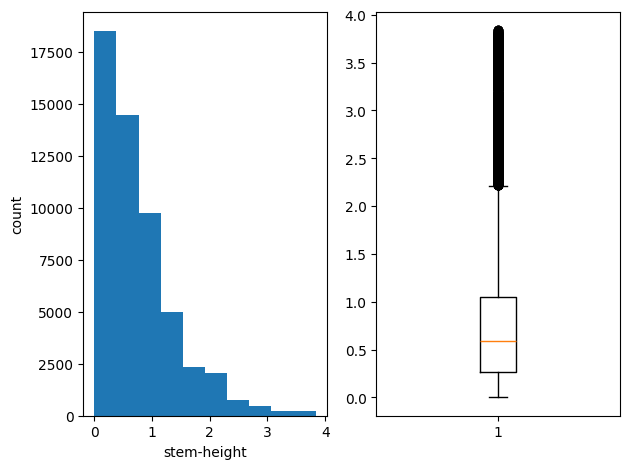

stem-width


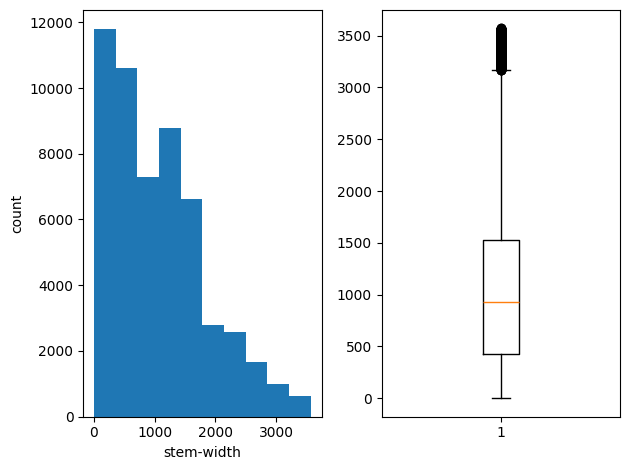

stem-color


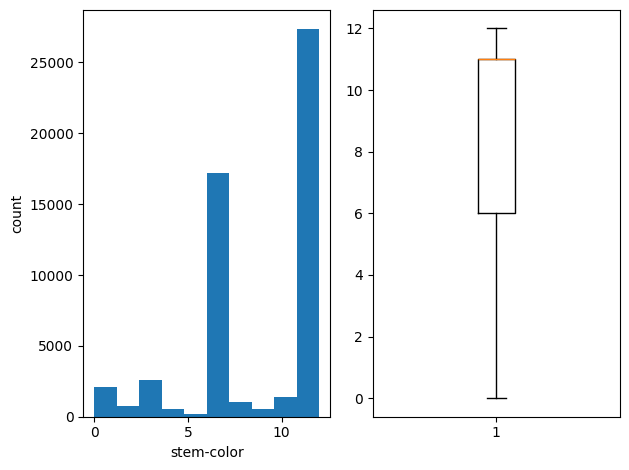

season


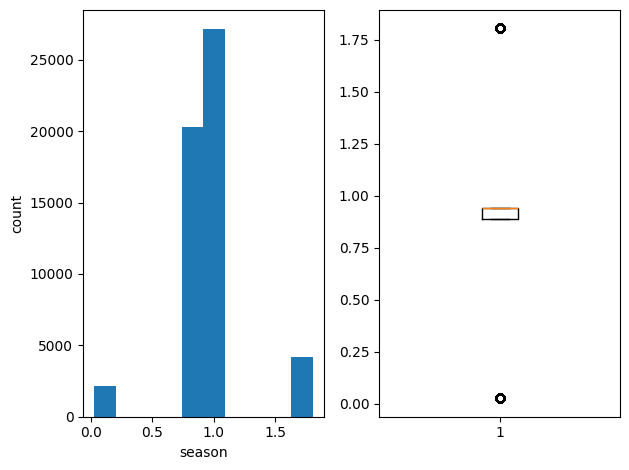

class


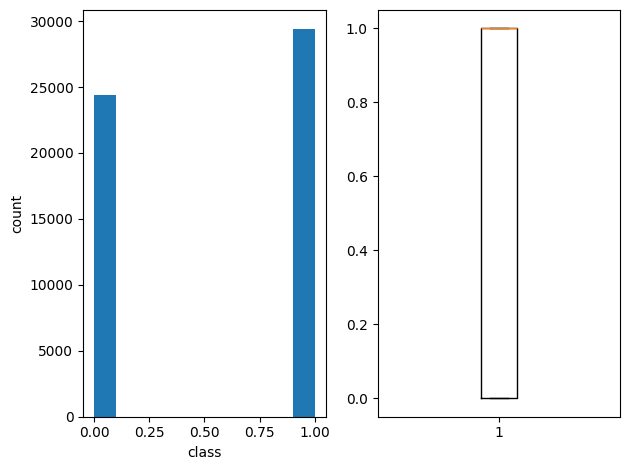

In [12]:
for i in col:
    print(i)

    plt.subplot(1,2,1)
    plt.hist(x=df[i])
    plt.xlabel(i)
    plt.ylabel('count')

    plt.subplot(1,2,2)
    plt.boxplot(df[i])

    plt.tight_layout()
    plt.show()

In [13]:
def iqr(df,x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    i = q3-q1
    lf = q1 - 1.5*i
    hf = q3 + 1.5*i
    df = df[(x >= lf) & (x <= hf)]
    return df
df = iqr(df,df['cap-diameter'])
df = iqr(df,df['stem-height'])
df = iqr(df,df['stem-width'])

<Axes: >

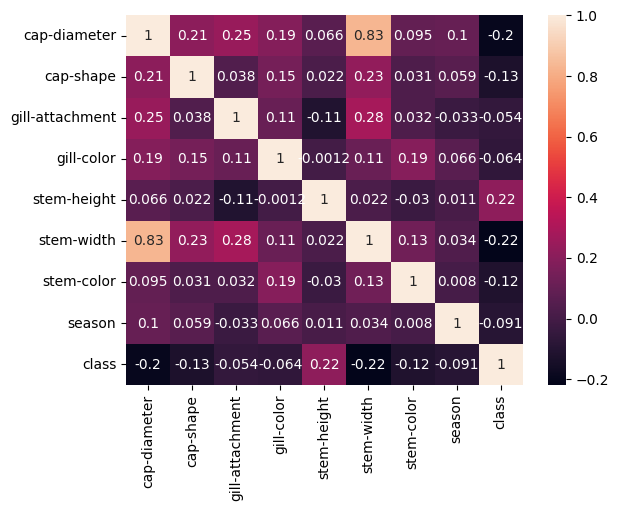

In [14]:
corr = df[col].corr()
sns.heatmap(corr,annot=True)

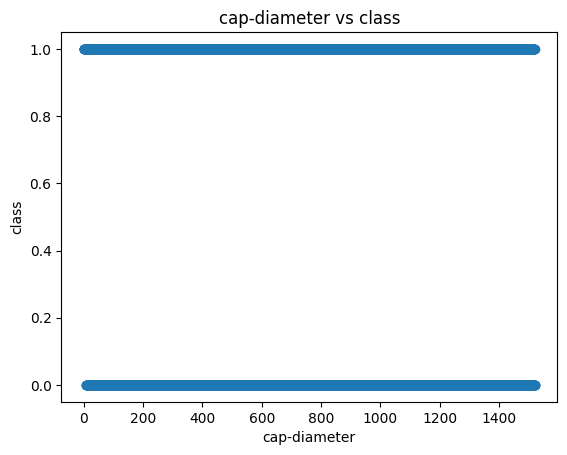

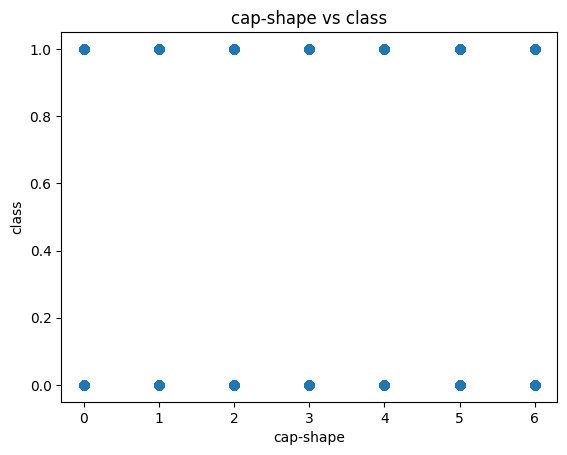

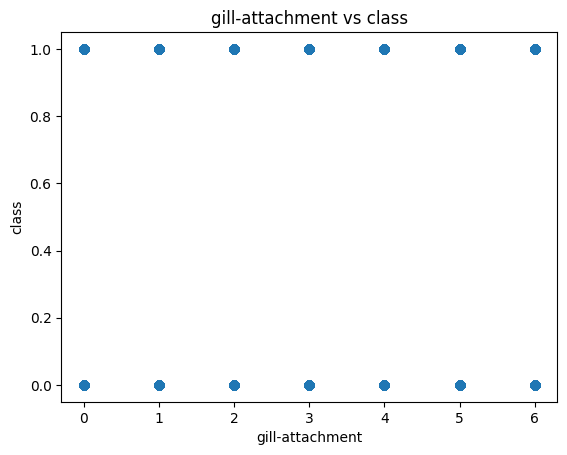

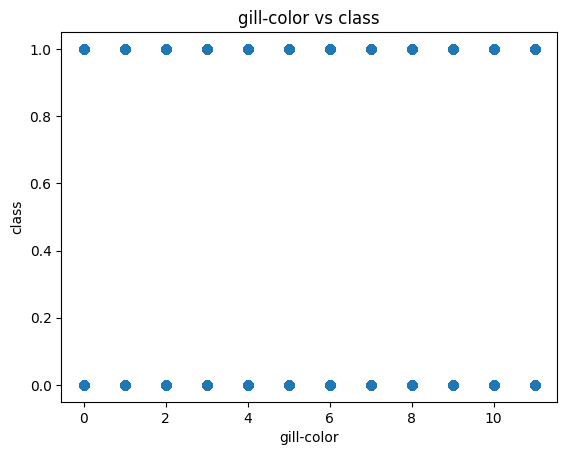

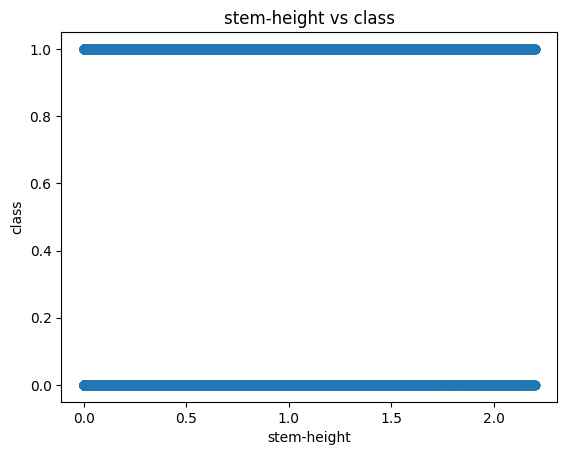

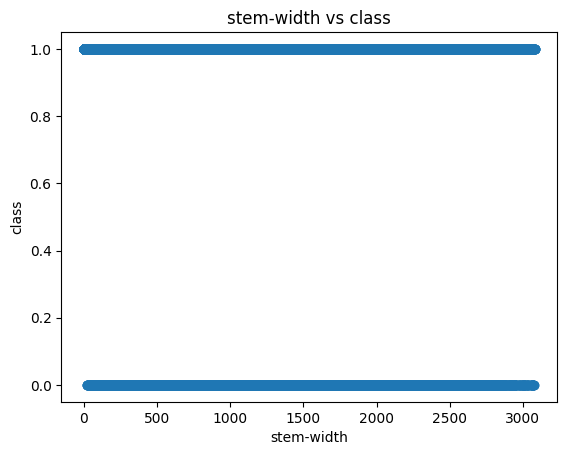

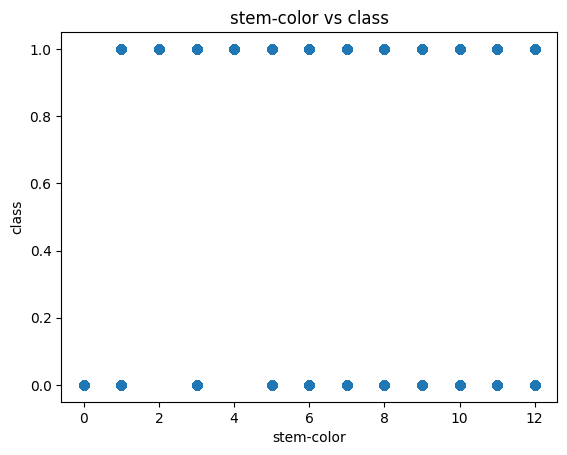

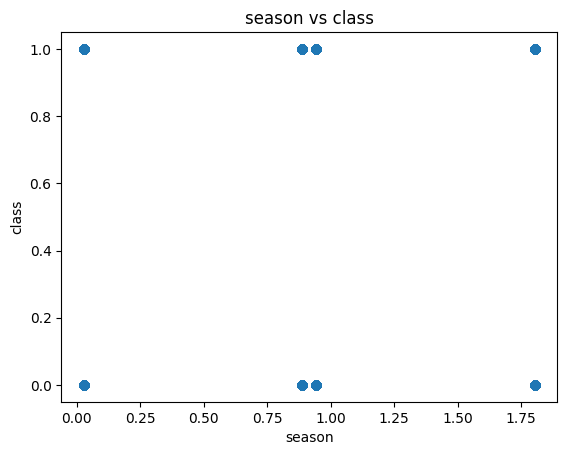

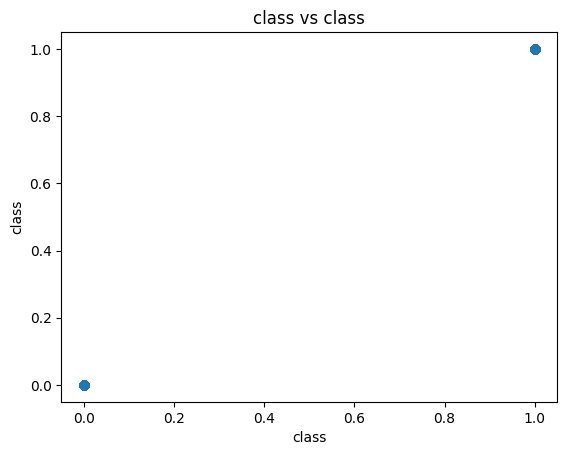

In [15]:
for i in col:
    plt.scatter(df[i],df['class'])
    plt.xlabel(i)
    plt.ylabel('class')
    plt.title(f'{i} vs class')
    plt.show()

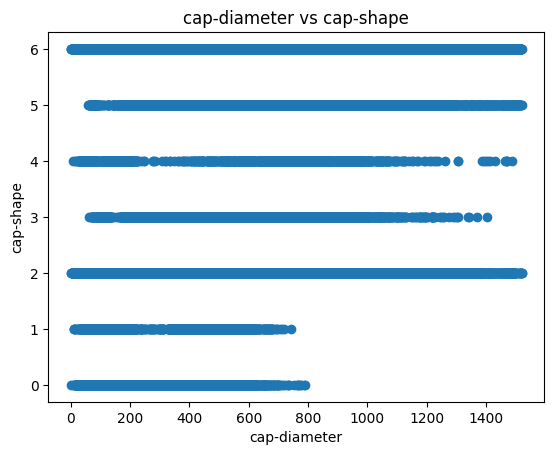

In [16]:
plt.scatter(df['cap-diameter'],df['cap-shape'])
plt.xlabel('cap-diameter')
plt.ylabel('cap-shape')
plt.title('cap-diameter vs cap-shape')
plt.show()

In [17]:
col

['cap-diameter',
 'cap-shape',
 'gill-attachment',
 'gill-color',
 'stem-height',
 'stem-width',
 'stem-color',
 'season',
 'class']

In [18]:
X = df[['cap-shape','stem-width','stem-height','stem-color']]
Y = np.array(df['class']).reshape(-1,1)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [20]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [21]:
# from sklearn.tree import export_graphviz
# from IPython.display import Image
# import pydotplus

# dot_data = export_graphviz(model, feature_names=X_train.columns, out_file=None, rounded=True, proportion=False, precision=2,filled=True)
# graph = pydotplus.graph_from_dot_data(dot_data)
# Image(graph.create_png())

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(Y_test,model.predict(X_test))

0.8434713691301764

In [23]:
cm = confusion_matrix(Y_test,model.predict(X_test))
cm

array([[3829,  806],
       [ 774, 4685]])

<Axes: >

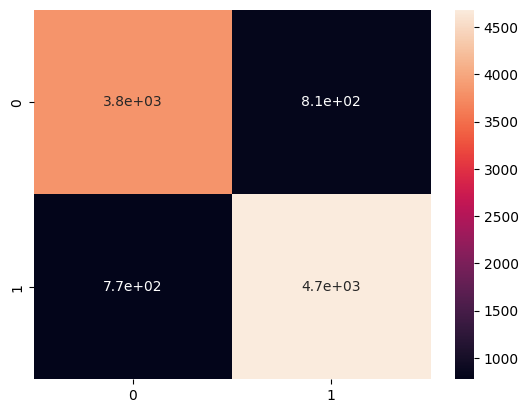

In [24]:
sns.heatmap(cm,annot=True)

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100) 
rf_classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [26]:
accuracy_score(Y_test,rf_classifier.predict(X_test))

0.8779472954230236

In [27]:
cm1 = confusion_matrix(Y_test,rf_classifier.predict(X_test))
cm1

array([[4063,  572],
       [ 660, 4799]])

<Axes: >

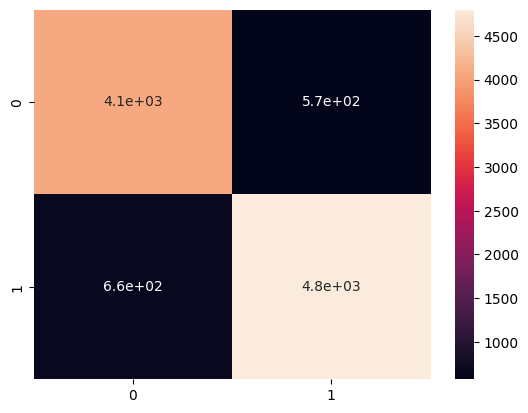

In [28]:
sns.heatmap(cm1,annot=True)